# Тема “Обучение с учителем”

## Задание 1

### Импортируйте библиотеки pandas и numpy.

In [ ]:
import numpy as np
import pandas as pd

Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn..

In [ ]:
# Из встроенных наборов данных не работает, так как он оттуда исключён
TRAIN_DATASET_PATH = './06 BostonHousing.csv'
boston_df = pd.read_csv(TRAIN_DATASET_PATH)
boston_df.tail()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9


### Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)<br>
с помощью функции train_test_split так,<br>
чтобы размер тестовой выборки составлял 30% от всех данных,<br>
при этом аргумент random state должен быть равен 42.

Переменные по порядку:<br>
- CRIM  - Уровень преступности на душу населения по городам
- ZN - доля жилых земель, зонированных для участков площадью более 25 000 кв. футов.
- INDUS - доля площадей под неторговую деятельность на город
- CHAS - Charles River (= 1, если тракт ограничивает реку; 0 в противном случае)
- NOX - Концентрация оксидов азота (частей на 10 миллионов)
- RМ - Среднее количество комнат в жилом помещении
- AGE - Доля квартир, занимаемых владельцами, построенных до 1940 г.
- DIS  - взвешенное расстояние до пяти центров занятости Бостона
- RAD - Индекс доступности радиальных магистралей
- TAX - Ставка налога на имущество на полную стоимость за 10 000 долларов США
- PTRATIO - Соотношение учеников и учителей по городам
- B - 1000(Bk - 0,63)^2, где Bk — доля чернокожих по городам.
- LSTAT - % более низкий статус населения
- MEDV - Средняя стоимость домов, занимаемых владельцами, в 1000 долларов США

In [ ]:
y = pd.DataFrame(boston_df['medv'], columns=["medv"])
X = boston_df.drop('medv', axis=1)
y = y.rename(columns={'medv': 'price'})

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)

### Создайте модель линейной регрессии под названием lr с помощью класса LinearRegression из модуля sklearn.linear_model.

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()

### Обучите модель на тренировочных данных (используйте все признаки) и сделайте предсказание на тестовых.

In [ ]:
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred_LR = lr.predict(X_test)

In [ ]:
check_test_LR = pd.DataFrame({
    "y_test": y_test["price"],
    "y_pred_LR": y_pred_LR.flatten(),
})

check_test_LR.head(10)

,y_test,y_pred_LR
173,23.6,28.648960
274,32.4,36.495014
491,13.6,15.411193
72,22.8,25.403213
452,16.1,18.855280
76,20.0,23.146689
316,17.8,17.392124
140,14.0,14.078599
471,19.6,23.036927
500,16.8,20.599433


## Задание 2

### Создайте модель под названием model с помощью класса RandomForestRegressor из модуля sklearn.ensemble.
Сделайте агрумент n_estimators равным 1000, max_depth должен быть равен 12 и random_state сделайте равным 42.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
model = RandomForestRegressor(n_estimators = 1000, max_depth = 12, random_state = 42)

### Обучите модель на тренировочных данных аналогично тому, как вы обучали модель LinearRegression, но при этом в метод fit вместо датафрейма y_train поставьте y_train.values[:, 0], чтобы получить из датафрейма одномерный массив Numpy, так как для класса RandomForestRegressor в данном методе для аргумента y предпочтительно применение массивов вместо датафрейма.

In [ ]:
model.fit(X_train, y_train.values[:, 0])

RandomForestRegressor(max_depth=12, n_estimators=1000, random_state=42)

### Сделайте предсказание на тестовых данных и посчитайте R2. Сравните с результатом из предыдущего задания.
Напишите в комментариях к коду, какая модель в данном случае работает лучше.

In [ ]:
y_pred_RFR = model.predict(X_test)

In [ ]:
check_test_RFR = pd.DataFrame({
    "y_test": y_test["price"],
    "y_pred_RFR": y_pred_RFR,
})

check_test_RFR.head(10)

,y_test,y_pred_RFR
173,23.6,22.806412
274,32.4,31.131464
491,13.6,16.339125
72,22.8,23.810726
452,16.1,17.139521
76,20.0,21.832284
316,17.8,19.895747
140,14.0,14.754118
471,19.6,21.240835
500,16.8,20.898658


In [ ]:
# Метрики качества
from sklearn.metrics import mean_squared_error as mse, r2_score as r2

In [ ]:
# Посчитаем метрики качества для линейной модели
mse_LR = mse(y_pred_LR.flatten(), y_test["price"])
rmse_LR = mse_LR**0.5
r2_LR = r2(y_pred_LR.flatten(), y_test["price"])
mse_LR, rmse_LR, r2_LR

(21.517444231177183, 4.638689926172818, 0.6693702691495614)

In [ ]:
mse_RFR = mse(y_pred_RFR, y_test["price"])
rmse_RFR = mse_RFR**0.5
r2_RFR = r2(y_pred_RFR, y_test["price"])
mse_RFR, rmse_RFR, r2_RFR

(9.334548946165196, 3.0552494081768833, 0.8479049999699443)

Модель "случайный лес" точнее "линейной регрессии". RMSE (отклонение) "случайного леса" примерно в полтора раза меньше. Точность модели - R2 - для "случайного леса" 84,8 % против 66,9 % у "линейной регрессии"

## *Задание 3

### Вызовите документацию для класса RandomForestRegressor,
найдите информацию об атрибуте feature_importances_.
С помощью этого атрибута найдите сумму всех показателей важности,
установите, какие два признака показывают наибольшую важность.

In [ ]:
help(RandomForestRegressor)

Help on class RandomForestRegressor in module sklearn.ensemble._forest:

class RandomForestRegressor(ForestRegressor)
 |  RandomForestRegressor(n_estimators=100, *, criterion='squared_error', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=1.0, max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)
 |  
 |  A random forest regressor.
 |  
 |  A random forest is a meta estimator that fits a number of classifying
 |  decision trees on various sub-samples of the dataset and uses averaging
 |  to improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is controlled with the `max_samples` parameter if
 |  `bootstrap=True` (default), otherwise the whole dataset is used to build
 |  each tree.
 |  
 |  Read more in the :ref:`User Guide <forest>`.
 |  
 |  Parameters
 |  ----------
 |  n_estimators 

In [ ]:
model.feature_importances_.sum()

1.0

In [ ]:
model.feature_importances_

array([0.03167574, 0.00154252, 0.00713813, 0.00123624, 0.01426897,
       0.40268179, 0.01429864, 0.06397257, 0.00528122, 0.01152493,
       0.01808108, 0.01245085, 0.41584732])

In [ ]:
df_df = pd.DataFrame({
    "name": X_test.columns.tolist(),
    "вес": list(model.feature_importances_),
})

df_df.sort_values("вес", ascending=False)

,name,вес
12,lstat,0.415847
5,rm,0.402682
7,dis,0.063973
0,crim,0.031676
10,ptratio,0.018081
6,age,0.014299
4,nox,0.014269
11,b,0.012451
9,tax,0.011525
2,indus,0.007138


причём при стандартизации признаков получаем тот же результат.

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
feature_names = X_train.keys()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_names)

X_test_scaled = scaler.fit_transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_names)

In [ ]:
model.fit(X_train_scaled, y_train.values[:, 0])

RandomForestRegressor(max_depth=12, n_estimators=1000, random_state=42)

In [ ]:
y_pred_RFR_scaled = model.predict(X_test_scaled)

In [ ]:
mse_RFR_scaled = mse(y_pred_RFR_scaled, y_test["price"])
rmse_RFR_scaled = mse_RFR_scaled**0.5
r2_RFR_scaled = r2(y_pred_RFR_scaled, y_test["price"])
mse_RFR_scaled, rmse_RFR_scaled, r2_RFR_scaled

(10.921058901818359, 3.304702543621492, 0.8356232361631597)

In [ ]:
df_df_scaled = pd.DataFrame({
    "name": X_test_scaled.columns.tolist(),
    "вес": list(model.feature_importances_),
})

df_df_scaled.sort_values("вес", ascending=False)

,name,вес
12,lstat,0.415847
5,rm,0.402682
7,dis,0.063973
0,crim,0.031676
10,ptratio,0.018081
6,age,0.014299
4,nox,0.014269
11,b,0.012451
9,tax,0.011525
2,indus,0.007138


## *Задание 4
В этом задании мы будем работать с датасетом, с которым мы уже знакомы по домашнему заданию по библиотеке Matplotlib, это датасет Credit Card Fraud Detection.<br>
Для этого датасета мы будем решать задачу классификации - будем определять, какие из транзакции по кредитной карте являются мошенническими.<br>
Данный датасет сильно несбалансирован (так как случаи мошенничества относительно редки), так что применение метрики accuracy не принесет пользы и не поможет выбрать лучшую модель.<br>
Мы будем вычислять AUC, то есть площадь под кривой ROC.<br>

### Импортируйте из соответствующих модулей RandomForestClassifier, GridSearchCV и train_test_split.<br>

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split


### Загрузите датасет creditcard.csv и создайте датафрейм df.<br>

In [ ]:
path = "04 creditcard.csv"
df = pd.read_csv(path)

### С помощью метода value_counts с аргументом normalize=True убедитесь в том, что выборка несбалансирована.<br>

In [ ]:
sign_of_fraud = df['Class'].value_counts(normalize=True)
sign_of_fraud

Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64

Выборка, действительно, не сбалансирована - мошенничеств всего 0,17 % (1 на 579) от всех транзакций

### Используя метод info, проверьте, все ли столбцы содержат числовые данные и нет ли в них пропусков.<br>

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Все столбцы содержат числовые данные и в них пропусков нет.

### Примените следующую настройку, чтобы можно было просматривать все столбцы датафрейма:<br>
pd.options.display.max_columns = 100.<br>

In [ ]:
pd.options.display.max_columns = 100

### Просмотрите первые 10 строк датафрейма df.<br>

In [ ]:
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,-1.416907,-0.153826,-0.751063,0.167372,0.050144,-0.443587,0.002821,-0.611987,-0.045575,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,-0.619468,0.291474,1.757964,-1.323865,0.686133,-0.076127,-1.222127,-0.358222,0.324505,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,-0.705117,-0.110452,-0.286254,0.074355,-0.328783,-0.210077,-0.499768,0.118765,0.570328,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,1.017614,0.836390,1.006844,-0.443523,0.150219,0.739453,-0.540980,0.476677,0.451773,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


### Создайте датафрейм X из датафрейма df, исключив столбец Class.<br>

In [ ]:
X = df.drop('Class', axis=1)
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


### Создайте объект Series под названием y из столбца Class.<br>

In [ ]:
# y = pd.DataFrame(df['Class'])
y = df['Class']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

### Разбейте X и y на тренировочный и тестовый наборы данных при помощи функции train_test_split, используя аргументы: test_size=0.3, random_state=100, stratify=y.<br>
У вас должны получиться объекты X_train, X_test, y_train и y_test.<br>

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=100, stratify=y)

### Просмотрите информацию о их форме.<br>

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((199364, 30), (85443, 30), (199364,), (85443,))

### Для поиска по сетке параметров задайте такие параметры:<br>
parameters = [{'n_estimators': [10, 15],<br>
'max_features': np.arange(3, 5),<br>
'max_depth': np.arange(4, 7)}]<br>

In [ ]:
parameters = {'n_estimators': [10, 15],
               'max_features': np.arange(3, 5),
               'max_depth': np.arange(4, 7)}

### Создайте модель GridSearchCV со следующими аргументами:<br>
estimator=RandomForestClassifier(random_state=100),<br>
param_grid=parameters,<br>
scoring='roc_auc',<br>
cv=3.<br>

In [ ]:
clf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=100),
    param_grid=parameters,
    scoring='roc_auc',
    cv=3,
)

### Обучите модель на тренировочном наборе данных (может занять несколько минут).

In [ ]:
clf.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=100),
             param_grid={'max_depth': array([4, 5, 6]),
                         'max_features': array([3, 4]),
                         'n_estimators': [10, 15]},
             scoring='roc_auc')

### Просмотрите параметры лучшей модели с помощью атрибута best_params_.<br>

In [ ]:
clf.best_params_

{'max_depth': 6, 'max_features': 3, 'n_estimators': 15}

### Предскажите вероятности классов с помощью полученной модели и метода predict_proba.<br>

In [ ]:
clf.predict_proba(X_test)

array([[9.99070828e-01, 9.29171738e-04],
       [9.99704794e-01, 2.95206364e-04],
       [9.99717846e-01, 2.82154033e-04],
       ...,
       [9.99717846e-01, 2.82154033e-04],
       [9.99317795e-01, 6.82204754e-04],
       [9.87539019e-01, 1.24609813e-02]])

### Из полученного результата (массив Numpy) выберите столбец с индексом 1 (вероятность класса 1) и запишите в массив y_pred_proba.<br>

In [ ]:
y_pred_proba = clf.predict_proba(X_test)
y_pred_proba = y_pred_proba[:, 1]
y_pred_proba[:5]

array([0.00092917, 0.00029521, 0.00028215, 0.00028215, 0.00028215])

### Из модуля sklearn.metrics импортируйте метрику roc_auc_score.<br>

In [ ]:
from sklearn.metrics import roc_auc_score

### Вычислите AUC на тестовых данных и сравните с результатом, полученным на тренировочных данных, используя в качестве аргументов массивы y_test и y_pred_proba.

In [ ]:

roc_auc_score(y_test, y_pred_proba)

0.9462664156037156

In [ ]:
y_pred_proba_train = clf.predict_proba(X_train)
y_pred_proba_train = y_pred_proba_train[:, 1]
y_pred_proba_train[:5]

array([0.00028215, 0.00028215, 0.00028215, 0.00033699, 0.00029521])

In [ ]:
roc_auc_score(y_train, y_pred_proba_train)

0.9703527882554751

На тренировочных данных точность предсказания несколько выше, но незначительно (обычная штатная ситуация).

## *Дополнительные задания:

### 1). Загрузите датасет Wine из встроенных датасетов sklearn.datasets с помощью функции load_wine в переменную data.<br>

In [ ]:
from sklearn.datasets import load_wine

In [ ]:
data = load_wine()
data

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

### 2). Полученный датасет не является датафреймом. Это структура данных, имеющая ключи аналогично словарю. Просмотрите тип данных этой структуры данных и создайте список data_keys, содержащий ее ключи.<br>

In [ ]:
type(data)

sklearn.utils._bunch.Bunch

In [ ]:
data_keys = data.keys()
data_keys

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

### 3). Просмотрите данные, описание и названия признаков в датасете. Описание нужно вывести в виде привычного, аккуратно оформленного текста, без обозначений переноса строки, но с самими переносами и т.д.<br>

In [ ]:
# Выведу вообще всё: данные - data, описание - DESCR, названия признаков - feature_names.
for i in data_keys:
  print(i)
  print(data[i])
  print()

data
[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]

target
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]

frame
None

target_names
['class_0' 'class_1' 'class_2']

DESCR
.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attrib

### 4). Сколько классов содержит целевая переменная датасета? Выведите названия классов.<br>

In [ ]:
# Ну, что ж - повторим:
print(f"Количество классов целевой переменной - {len(data['target_names'])}")
print(data['target_names'])

Количество классов целевой переменной - 3
['class_0' 'class_1' 'class_2']


### 5). На основе данных датасета (они содержатся в двумерном массиве Numpy) и названий признаков создайте датафрейм под названием X.<br>

In [ ]:
X = pd.DataFrame(data['data'], columns=feature_names)
X

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


### 6). Выясните размер датафрейма X и установите, имеются ли в нем пропущенные значения.<br>

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     178 non-null    float64
 1   zn       178 non-null    float64
 2   indus    178 non-null    float64
 3   chas     178 non-null    float64
 4   nox      178 non-null    float64
 5   rm       178 non-null    float64
 6   age      178 non-null    float64
 7   dis      178 non-null    float64
 8   rad      178 non-null    float64
 9   tax      178 non-null    float64
 10  ptratio  178 non-null    float64
 11  b        178 non-null    float64
 12  lstat    178 non-null    float64
dtypes: float64(13)
memory usage: 18.2 KB


In [ ]:
X.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
dtype: int64

пропущенных значений нет

7). Добавьте в датафрейм поле с классами вин в виде чисел, имеющих тип данных numpy.int64. Название поля - 'target'.<br>

In [ ]:
X['target'] = data['target']

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     178 non-null    float64
 1   zn       178 non-null    float64
 2   indus    178 non-null    float64
 3   chas     178 non-null    float64
 4   nox      178 non-null    float64
 5   rm       178 non-null    float64
 6   age      178 non-null    float64
 7   dis      178 non-null    float64
 8   rad      178 non-null    float64
 9   tax      178 non-null    float64
 10  ptratio  178 non-null    float64
 11  b        178 non-null    float64
 12  lstat    178 non-null    float64
 13  target   178 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 19.6 KB


### 8). Постройте матрицу корреляций для всех полей X. Дайте полученному датафрейму название X_corr.<br>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

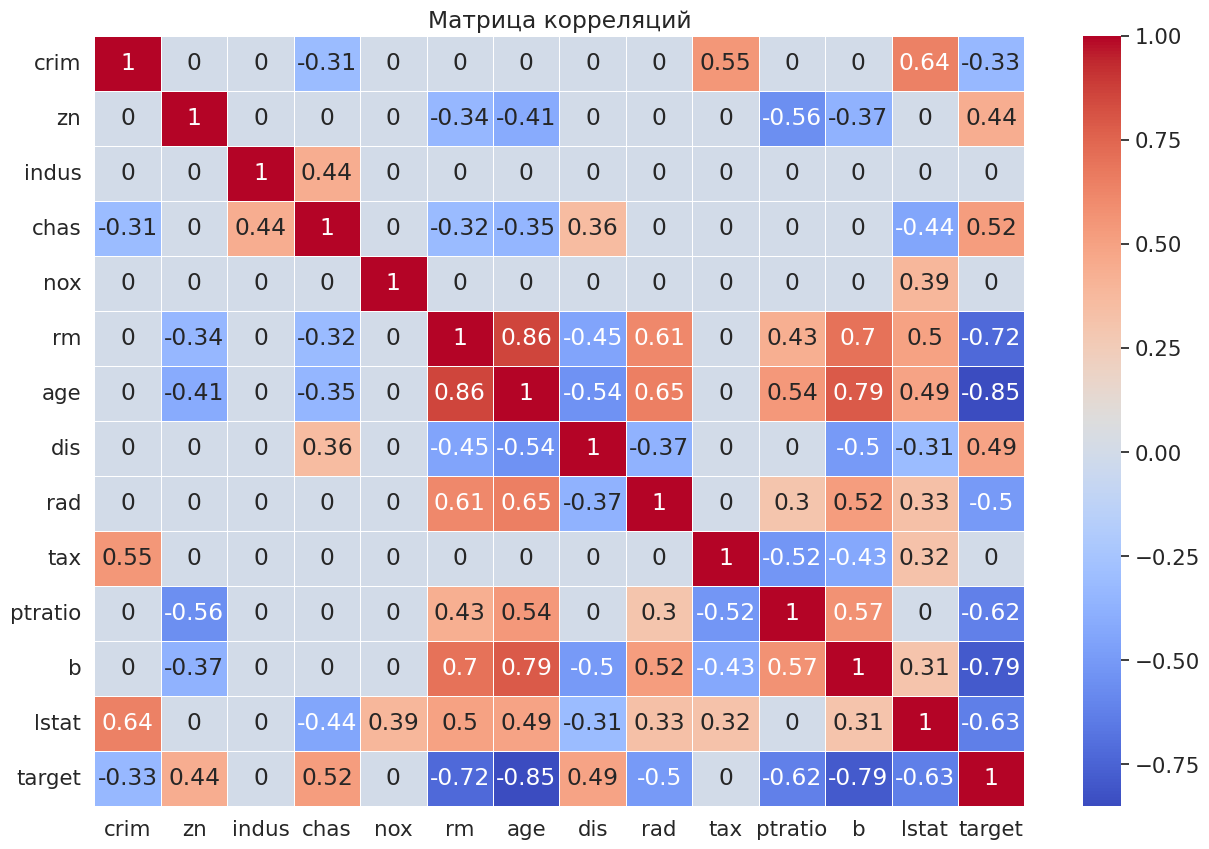

In [ ]:
X_corr = X.corr()
X_corr = np.round(X_corr, 2)
X_corr[np.abs(X_corr) < 0.3] = 0

plt.figure(figsize = (15,10))
sns.set(font_scale=1.4)
sns.heatmap(X_corr, annot=True, linewidths=.5, cmap='coolwarm')
plt.title('Матрица корреляций')
plt.show()

### 9). Создайте список high_corr из признаков, корреляция которых с полем target по абсолютному значению превышает 0.5 (причем, само поле target не должно входить в этот список).<br>

In [ ]:
high_corr = X_corr[np.abs(X_corr['target']) > 0.5].reset_index()
high_corr = list(high_corr['index'])[:-1]
high_corr

['chas', 'rm', 'age', 'ptratio', 'b', 'lstat']

### 10).<br>
- Удалите из датафрейма X поле с целевой переменной.<br>
- Для всех признаков, названия которых содержатся в списке high_corr, вычислите квадрат их значений и добавьте в датафрейм X соответствующие поля с суффиксом '_2', добавленного к первоначальному названию признака.<br>
Итоговый датафрейм должен содержать все поля, которые, были в нем изначально, а также поля с признаками из списка high_corr, возведенными в квадрат.<br>
- Выведите описание полей датафрейма X с помощью метода describe.

In [ ]:
X=X.drop('target', axis=1)
X

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [194]:
for i in high_corr:
  feature = i+'_2'
  X[feature] = X[i]**2

In [195]:
X.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,chas_2,rm_2,age_2,ptratio_2,b_2,lstat_2
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,1.780000e+02
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,391.142865,5.657030,5.110049,0.968661,7.322155,6.564591e+05
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,133.671775,2.936294,4.211441,0.443798,3.584316,5.558591e+05
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,112.360000,0.960400,0.115600,0.230400,1.612900,7.728400e+04
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,295.840000,3.036325,1.452100,0.612325,3.754075,2.505010e+05
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,380.250000,5.546050,4.558250,0.931250,7.728400,4.536045e+05
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,462.250000,7.840000,8.265700,1.254400,10.048900,9.702250e+05
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,900.000000,15.054400,25.806400,2.924100,16.000000,2.822400e+06
